In [ ]:
import datasets

all_datasets = {
    'llama train lr=1e-5': ('Asap7772/code_contests_llamasft1e-5_mc_passk_train-part1-of-1_graded', 'train'),
    'llama train lr=1e-7': ('Asap7772/code_contests_llamasft1e-7_mc_passk_train-part1-of-1_graded', 'train'),
    'llama lr=1e-5': ('Asap7772/code_contests_llamasft1e-5_mc_passk-part1-of-1_graded', 'train'),
    'llama lr=1e-6': ('Asap7772/code_contests_llamasft1e-6_mc_passk-part1-of-1_graded', 'train'),
    'llama lr=1e-7': ('Asap7772/code_contests_llamasft1e-7_mc_passk-part1-of-1_graded', 'train'),
    'qwen': ('Asap7772/code_contests_qwensft1e-5_mc_passk-part1-of-1_graded', 'train'),
}

all_ds = {k: datasets.load_dataset(v[0], split=v[1]) for k, v in all_datasets.items()}
all_scores_dict = {k: ds['is_corrects'] for k, ds in all_ds.items()}

Generating train split: 100%|██████████| 6354/6354 [00:03<00:00, 1596.17 examples/s]


In [7]:
import numpy as np
def pass_at_k(n, c, k):
    """
    :param n: total number of samples
    :param c: number of correct samples
    :param k: k in pass@$k$
    """
    if n - c < k:
        return 1.0
    return 1.0 - np.prod(1.0 - k / np.arange(n - c + 1, n + 1))

In [8]:
all_passk = {}
for name, all_scores in all_scores_dict.items():
    pass_k_arr = np.empty((len(all_scores), len(all_scores[0])))
    for i in range(len(all_scores)):
        num_samples = len(all_scores[i])
        num_correct = sum(all_scores[i])
        for k in range(1, num_samples + 1):
            pass_k_arr[i, k - 1] = pass_at_k(num_samples, num_correct, k)
    pass_k_arr = pass_k_arr.mean(axis=0)
    all_passk[name] = pass_k_arr

In [9]:
print(all_passk.keys())

dict_keys(['llama lr=1e-5', 'llama train lr=1e-5', 'llama lr=1e-6', 'llama lr=1e-7', 'qwen'])


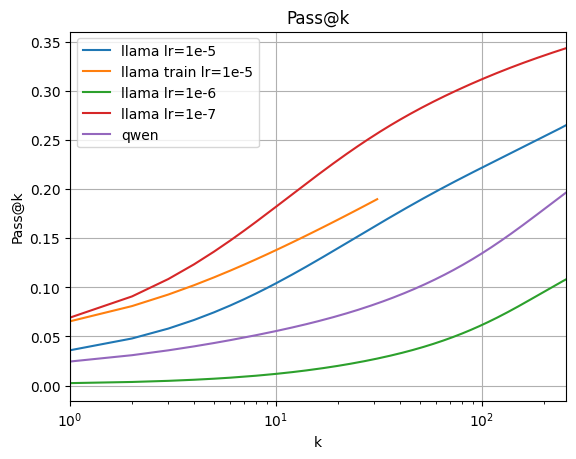

In [10]:
import matplotlib.pyplot as plt
import numpy as np
for k, pass_k_arr in all_passk.items():
    plt.plot(pass_k_arr, label=k)
plt.xlabel('k')
plt.ylabel('Pass@k')
plt.title('Pass@k')
plt.xscale('log', base=10)
plt.xlim(1, len(pass_k_arr))
plt.legend()
plt.grid()
plt.show()